In [16]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
def load_images(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (100, 100))  # Resize images to a fixed size
        images.append(img.flatten())  # Convert images to 1D arrays
        labels.append(label)
    return images, labels

In [18]:
import os
import cv2
import numpy as np

def load_images(folder_path, label):
    images = []
    labels = []
    
    for filename in os.listdir(folder_path):
        # Skip non-image files based on the extension
        if not (filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg")):
            print(f"Skipping non-image file: {filename}")
            continue
        
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue
        
        img = cv2.resize(img, (100, 100))
        images.append(img.flatten())
        labels.append(label)
    
    return np.array(images), np.array(labels)

# Paths to the directories
cat_path = r"input CAT"
dog_path = r"inputDOG"

# Load and work on images from the first path (e.g., CAT images)
cats_images, cats_labels = load_images(cat_path, 0)
print(f"Loaded {len(cats_images)} CAT images.")

# Once done with CAT images, move on to the next path (e.g., DOG images)
dogs_images, dogs_labels = load_images(dog_path, 1)
print(f"Loaded {len(dogs_images)} DOG images.")

# Combine the images and labels from both categories
X = np.concatenate((cats_images, dogs_images), axis=0)
y = np.concatenate((cats_labels, dogs_labels), axis=0)

# Save the images and labels to a .npz file
output_file = r"input.npz"
np.savez_compressed(output_file, images=X, labels=y)

print(f"Saved images and labels to {output_file}.")


Skipping non-image file: .gitkeep
Loaded 100 CAT images.
Skipping non-image file: .gitkeep
Loaded 100 DOG images.
Saved images and labels to C:\Users\91934\Downloads\Data\Images\cats_and_dogs.npz.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear')  # Linear kernel is used for simplicity, you can experiment with other kernels
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [20]:
# Evaluate the model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6


In [21]:
cm = confusion_matrix(y_test, y_pred)

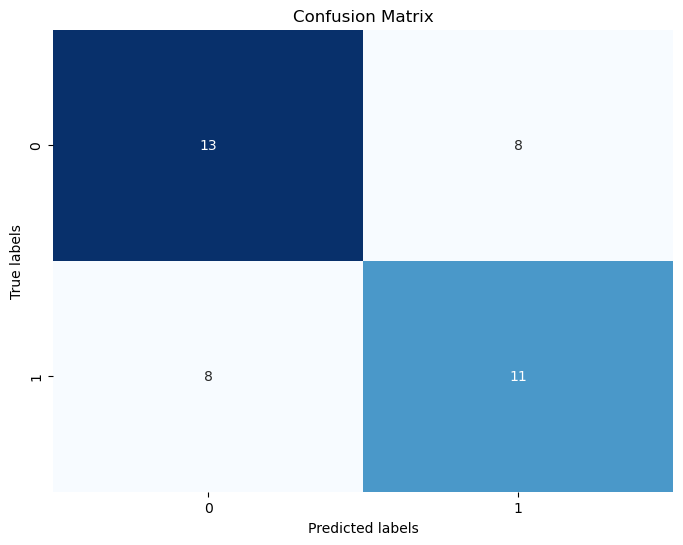

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [23]:
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        21
           1       0.58      0.58      0.58        19

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40

